In [49]:
import glob
import json

perplexities = {}

for file in glob.glob('*/all_results.json'):
    name = file.split("\\")[0]
    try:
        perplexities[name] = json.load(open(file, "r"))['perplexity']
    except:
        continue

In [50]:
perplexities

{'bart-0.1': 584.318775272272,
 'bart-0.5': 1888.5710496334407,
 'bart-0.9': 1.0095768877622229,
 'bart-0.95': 1.0027321311275057,
 'bart-0.99': 1.0000402693471835,
 'bart-base': 1848.6423490716256,
 'bert-base': 1.0846661749618185,
 'bert-base-0.1': 1.2445919523745683,
 'bert-base-0.5': 4.924881191950635,
 'bert-base-0.9': 274.2968961800083,
 'bert-base-0.95': 1287.7836382791152,
 'bert-base-0.99': 455.64787808104836,
 'gpt2-0.1': 21.63919563079019,
 'gpt2-0.5': 34.73099291258811,
 'gpt2-0.9': 830.69394420909,
 'gpt2-0.95': 1448.0162713867576,
 'gpt2-0.99': 1724.3948796919844,
 'gpt2-base': 21.561401137427417,
 'test-clm-gpt2-base': 21.561401137427417,
 'test-clm-pegasus-0.0-train': 1.002462760907067}

In [51]:
def sort_graphs(p):
    return zip(*sorted(zip(list(p.keys()), list(p.values()))))

In [52]:
bert_perplexities = {float(name.split("-")[-1] if '0' in name else 0): perplexities[name] for name in perplexities if 'bert' in name}
bert_keys, bert_vals = sort_graphs(bert_perplexities)

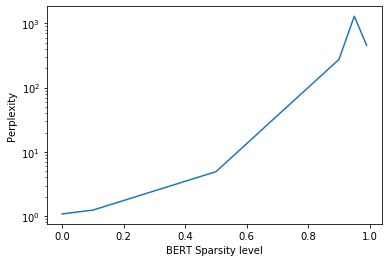

In [53]:
import matplotlib.pyplot as plt
plt.plot(bert_keys, bert_vals)
plt.xlabel("BERT Sparsity level")
plt.ylabel("Perplexity")
plt.yscale('log')

In [54]:
gpt_perplexities = {float(name.split("-")[-1] if '0' in name else 0): perplexities[name] for name in perplexities if 'gpt' in name}
gpt_keys, gpt_vals = sort_graphs(gpt_perplexities)

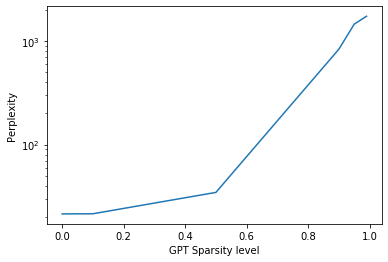

In [55]:
import matplotlib.pyplot as plt
plt.plot(gpt_keys, gpt_vals)
plt.xlabel("GPT Sparsity level")
plt.ylabel("Perplexity")
plt.yscale('log')

In [57]:
bart_perplexities = {float(name.split("-")[-1] if '0' in name else 0): perplexities[name] for name in perplexities if 'bart' in name}
bart_keys, bart_vals = sort_graphs(bart_perplexities)

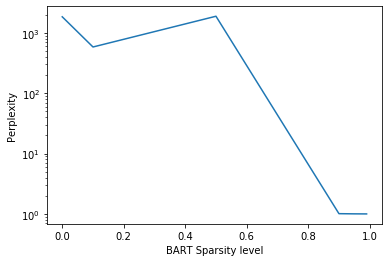

In [58]:
import matplotlib.pyplot as plt
plt.plot(bart_keys, bart_vals)
plt.xlabel("BART Sparsity level")
plt.ylabel("Perplexity")
plt.yscale('log')

In [106]:
import glob
import json

xnlis = {}

for file in glob.glob('*/all_results.json'):
    name = file.split("\\")[0]
    try:
        if 'nli' not in name:
            continue
        xnlis[name] = json.load(open(file, "r"))['eval_accuracy']
    except:
        continue

In [107]:
bert_xnli = {float(name.split("_")[-2] if '0' in name else 0): xnlis[name] for name in xnlis if 'bert' in name}
bert_xnli_keys, bert_xnli_vals = sort_graphs(bert_xnli)

Text(0, 0.5, 'XNLI Accuracy')

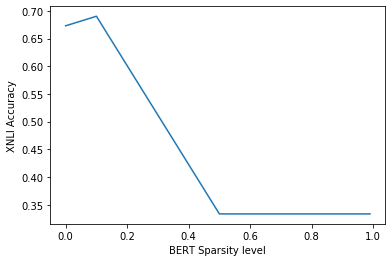

In [112]:
import matplotlib.pyplot as plt
plt.plot(bert_xnli_keys, bert_xnli_vals)
plt.xlabel("BERT Sparsity level")
plt.ylabel("XNLI Accuracy")


In [121]:
bart_xnli = {float(".".join(name.split("_")[-2].split(".")[1:]) if '0' in name else 0): xnlis[name] for name in xnlis if 'bart' in name}
bart_xnli[0.99] = bart_xnli[99.0]
del bart_xnli[99.0]
bart_xnli_keys, bart_xnli_vals = sort_graphs(bart_xnli)

Text(0, 0.5, 'XNLI Accuracy')

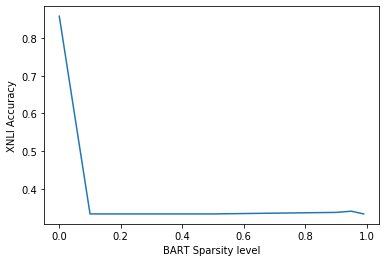

In [123]:
import matplotlib.pyplot as plt
plt.plot(bart_xnli_keys, bart_xnli_vals)
plt.xlabel("BART Sparsity level")
plt.ylabel("XNLI Accuracy")


In [125]:
gpt_xnli = {float(name.split("_")[-2] if '0' in name else 0): xnlis[name] for name in xnlis if 'gpt' in name}
gpt_xnli_keys, gpt_xnli_vals = sort_graphs(gpt_xnli)

Text(0, 0.5, 'XNLI Accuracy')

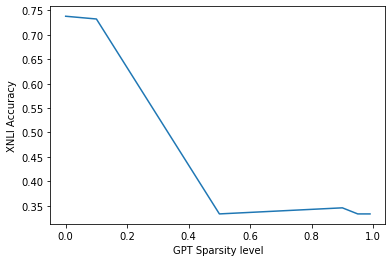

In [127]:
import matplotlib.pyplot as plt
plt.plot(gpt_xnli_keys, gpt_xnli_vals)
plt.xlabel("GPT Sparsity level")
plt.ylabel("XNLI Accuracy")


In [62]:
runtimes = {}

for file in glob.glob('*/all_results.json'):
    name = file.split("\\")[0]
    try:
        runtimes[name] = json.load(open(file, "r"))['eval_samples_per_second']
    except:
        continue

In [63]:
runtimes

{'bart-0.1': 42.522,
 'bart-0.5': 42.934,
 'bart-0.9': 44.09,
 'bart-0.95': 42.814,
 'bart-0.99': 45.216,
 'bart-base': 43.94,
 'bart.0.1_mnli': 508.609,
 'bart.0.5_mnli': 474.195,
 'bart.0.95_mnli': 402.178,
 'bart.0.9_mnli': 472.113,
 'bart_0.99_mnli': 156.187,
 'bart_large_mnli': 539.616,
 'bert-base': 115.418,
 'bert-base-0.1': 93.338,
 'bert-base-0.5': 97.856,
 'bert-base-0.9': 113.966,
 'bert-base-0.95': 93.039,
 'bert-base-0.99': 99.348,
 'bert-glue': 568.145,
 'bert-glue-0.1': 529.625,
 'bert-glue-0.5': 569.762,
 'bert-glue-0.9': 567.476,
 'bert-glue-0.95': 529.308,
 'bert-glue-0.99': 609.145,
 'bert_large_0.1_mnli': 182.677,
 'bert_large_0.5_mnli': 188.414,
 'bert_large_0.95_mnli': 188.321,
 'bert_large_0.99_mnli': 188.047,
 'bert_large_0.9_mnli': 181.81,
 'bert_large_mnli': 188.642,
 'gpt2-0.1': 56.827,
 'gpt2-0.5': 68.735,
 'gpt2-0.9': 69.701,
 'gpt2-0.95': 69.616,
 'gpt2-0.99': 69.702,
 'gpt2-base': 69.735,
 'gpt_0.1_xnli': 531.602,
 'gpt_0.5_xnli': 534.116,
 'gpt_0.95_xnli

In [64]:
bert_runtimes= {float(name.split("-")[-1] if '0' in name else 0): runtimes[name] for name in runtimes if 'bert' in name and 'nli' not in name}
bert_run_keys, bert_run_vals = sort_graphs(bert_runtimes)

Text(0, 0.5, 'Runtime (Evals per second)')

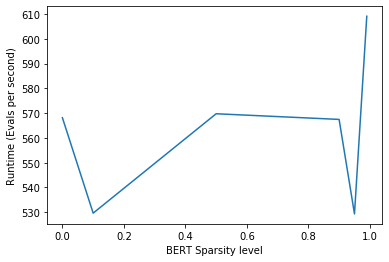

In [65]:
import matplotlib.pyplot as plt
plt.plot(bert_run_keys, bert_run_vals)
plt.xlabel("BERT Sparsity level")
plt.ylabel("CLM Runtime (Evals per second)")

In [71]:
bert_nli_runtimes= {float(name.split("_")[-2] if '0' in name else 0): runtimes[name] for name in runtimes if 'bert' in name and 'nli' in name}
bert_nli_run_keys, bert_nli_run_vals = sort_graphs(bert_nli_runtimes)

Text(0, 0.5, 'XNLI Runtime (Evals per second)')

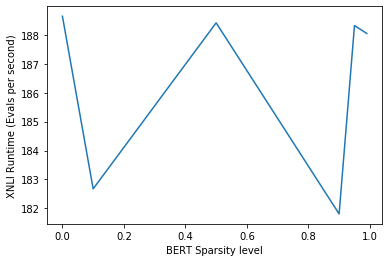

In [72]:
import matplotlib.pyplot as plt
plt.plot(bert_nli_run_keys, bert_nli_run_vals)
plt.xlabel("BERT Sparsity level")
plt.ylabel("XNLI Runtime (Evals per second)")

In [79]:
gpt_runtimes= {float(name.split("-")[-1] if '0' in name else 0): runtimes[name] for name in runtimes if 'gpt' in name and 'nli' not in name}
gpt_run_keys, gpt_run_vals = sort_graphs(gpt_runtimes)

Text(0, 0.5, 'CLM Runtime (Evals per second)')

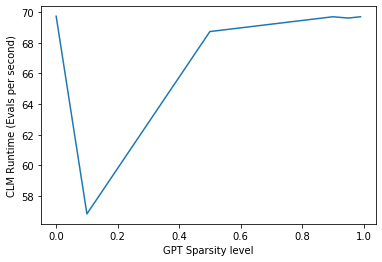

In [81]:
import matplotlib.pyplot as plt
plt.plot(gpt_run_keys, gpt_run_vals)
plt.xlabel("GPT Sparsity level")
plt.ylabel("CLM Runtime (Evals per second)")

In [83]:
gpt_nli_runtimes= {float(name.split("_")[-2] if '0' in name else 0): runtimes[name] for name in runtimes if 'gpt' in name and 'nli' in name}
gpt_nli_run_keys, gpt_nli_run_vals = sort_graphs(gpt_nli_runtimes)

Text(0, 0.5, 'XNLI Runtime (Evals per second)')

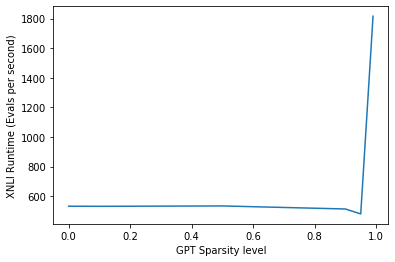

In [84]:
import matplotlib.pyplot as plt
plt.plot(gpt_nli_run_keys, gpt_nli_run_vals)
plt.xlabel("GPT Sparsity level")
plt.ylabel("XNLI Runtime (Evals per second)")

In [85]:
bart_runtimes= {float(name.split("-")[-1] if '0' in name else 0): runtimes[name] for name in runtimes if 'bart' in name and 'nli' not in name}
bart_run_keys, bart_run_vals = sort_graphs(bart_runtimes)

Text(0, 0.5, 'CLM Runtime (Evals per second)')

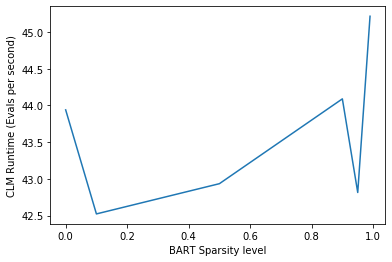

In [86]:
import matplotlib.pyplot as plt
plt.plot(bart_run_keys, bart_run_vals)
plt.xlabel("BART Sparsity level")
plt.ylabel("CLM Runtime (Evals per second)")

In [92]:
bart_nli_runtimes= {float(".".join(name.split("_")[-2].split(".")[1:]) if '0' in name else 0): runtimes[name] for name in runtimes if 'bart' in name and 'nli' in name}
bart_nli_run_keys, bart_nli_run_vals = sort_graphs(bart_nli_runtimes)

Text(0, 0.5, 'XNLI Runtime (Evals per second)')

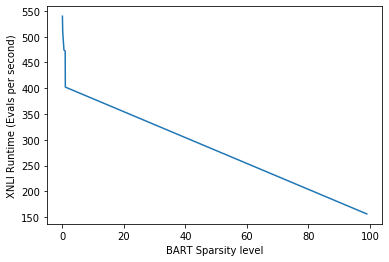

In [93]:
import matplotlib.pyplot as plt
plt.plot(bart_nli_run_keys, bart_nli_run_vals)
plt.xlabel("BART Sparsity level")
plt.ylabel("XNLI Runtime (Evals per second)")

In [96]:
model_sizes = json.load(open("./model_sizes.json", "r"))

In [40]:
model_sizes

{'bert.0.1': 1334444913,
 'bert.0.5': 1334444913,
 'bert.0.9': 1334444913,
 'bert.0.95': 1334444913,
 'bert.0.99': 1334444913,
 'bert.base': 1334444913,
 'gpt2.0.1': 510391913,
 'gpt2.0.5': 510391913,
 'gpt2.0.9': 510391913,
 'gpt2.0.95': 510391913,
 'gpt2.0.99': 510391913,
 'gpt2.base': 510391913}

In [42]:
bert_sizes= {0.01 * float(name.split(".")[-1] if '0' in name else 0): model_sizes[name] for name in model_sizes if 'bert' in name}
bert_size_keys, bert_size_vals = sort_graphs(bert_sizes)

Text(0, 0.5, 'Size of Model on Disk')

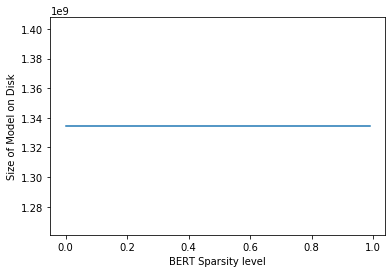

In [46]:
import matplotlib.pyplot as plt
plt.plot(bert_size_keys, bert_size_vals)
plt.xlabel("BERT Sparsity level")
plt.ylabel("Size of Model on Disk")

In [47]:
gpt_sizes= {0.01 * float(name.split(".")[-1] if '0' in name else 0): model_sizes[name] for name in model_sizes if 'gpt' in name}
gpt_size_keys, gpt_size_vals = sort_graphs(gpt_sizes)

Text(0, 0.5, 'Size of Model on Disk')

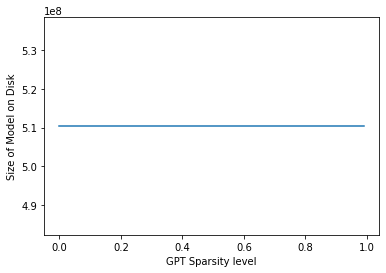

In [97]:
import matplotlib.pyplot as plt
plt.plot(gpt_size_keys, gpt_size_vals)
plt.xlabel("GPT Sparsity level")
plt.ylabel("Size of Model on Disk")

In [98]:
bart_sizes= {0.01 * float(name.split(".")[-1] if '0' in name else 0): model_sizes[name] for name in model_sizes if 'bart' in name}
bart_size_keys, bart_size_vals = sort_graphs(bart_sizes)

Text(0, 0.5, 'Size of Model on Disk')

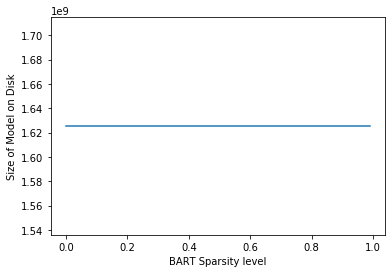

In [100]:
import matplotlib.pyplot as plt
plt.plot(bart_size_keys, bart_size_vals)
plt.xlabel("BART Sparsity level")
plt.ylabel("Size of Model on Disk")